In [1]:
import pandas  as pd
import numpy as np

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [7]:
df = pd.read_csv('../data/european_birds.csv')
df.head()

primary_label secondary_labels                    type  latitude  longitude   
0        amtspa               []                ['call']   55.6237    13.2427  \
1        amtspa               []                ['call']   55.6237    13.2427   
2        amtspa               []                ['call']   55.6237    13.2427   
3        banswa               []                ['call']   54.5592    11.9695   
4        banswa               []  ['alarm call', 'call']   46.1374     5.9609   

        scientific_name            common_name        date      filename   
0  Spizelloides arborea  American Tree Sparrow  2016-11-12  XC342444.ogg  \
1  Spizelloides arborea  American Tree Sparrow  2016-11-16  XC342952.ogg   
2  Spizelloides arborea  American Tree Sparrow  2016-11-16  XC342954.ogg   
3       Riparia riparia           Bank Swallow  2013-06-08  XC138517.ogg   
4       Riparia riparia           Bank Swallow  2013-07-13  XC142649.ogg   

                                             license  rating   time   
0  Creative Commons Attribution-NonCommercial-Sha...     2.0  14:00  \
1  Creative Commons Attribution-NonCommercial-Sha...     3.0  08:31   
2  Creative Commons Attribution-NonCommercial-Sha...     4.0  10:28   
3  Creative Commons Attribution-NonCommercial-Sha...     4.0  05:18   
4  Creative Commons Attribution-NonCommercial-Sha...     3.5  09:00   

                  geometry  
0  POINT (13.2427 55.6237)  
1  POINT (13.2427 55.6237)  
2  POINT (13.2427 55.6237)  
3  POINT (11.9695 54.5592)  
4   POINT (5.9609 46.1374)

In [8]:
unique_common_names = df['common_name'].nunique()
print(f"Number of unique common names: {unique_common_names}")

Number of unique common names: 143


In [9]:
bird_species = df.groupby('common_name').agg(
    count=('common_name', 'size'),
    scientific_name=('scientific_name', 'first'),
    primary_label=('primary_label', 'first')
).reset_index()

print(bird_species)
bird_species.to_csv('bird_species_summary.csv', index=False)

               common_name  count           scientific_name primary_label
0      African Sacred Ibis      2  Threskiornis aethiopicus       sacibi2
1    American Tree Sparrow      3      Spizelloides arborea        amtspa
2          American Wigeon      1          Mareca americana        amewig
3              Arctic Tern    162         Sterna paradisaea        arcter
4             Bank Swallow     86           Riparia riparia        banswa
..                     ...    ...                       ...           ...
138         Willow Warbler    423    Phylloscopus trochilus        wlwwar
139         Wilson's Snipe     11        Gallinago delicata       wilsni1
140              Wood Duck      3                Aix sponsa        wooduc
141         Wood Sandpiper    774           Tringa glareola        woosan
142      Zitting Cisticola    360        Cisticola juncidis       zitcis1

[143 rows x 4 columns]


 Further EDA: 

 What calls
    distribution of calls in species

Clusters of density in places 



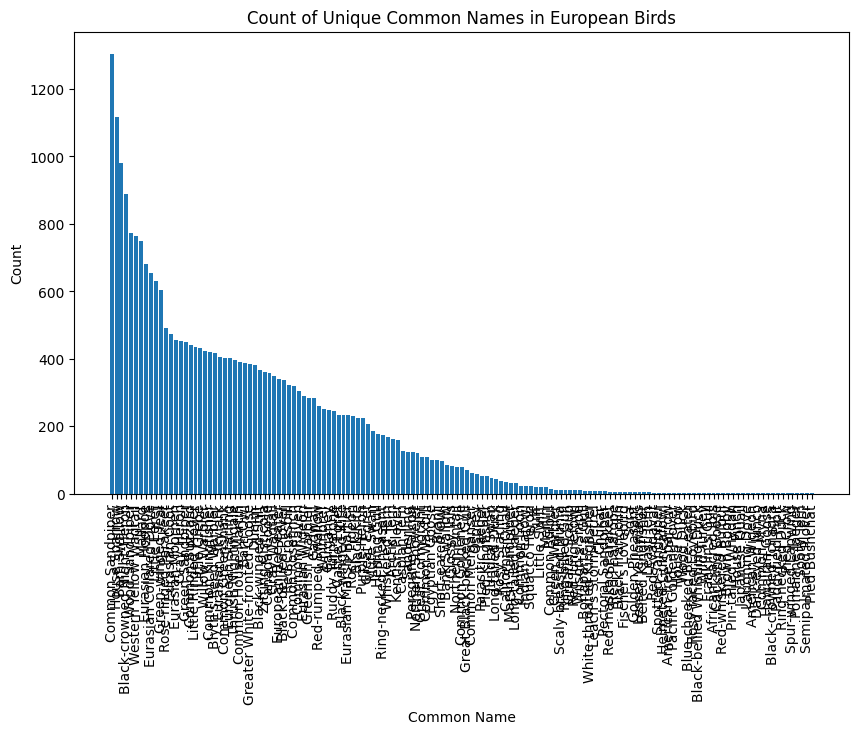

In [10]:
import matplotlib.pyplot as plt

bird_species = bird_species.sort_values(by='count', ascending=False)
# Plot the count of all unique common names
plt.figure(figsize=(10, 6))
plt.bar(bird_species['common_name'], bird_species['count'])
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.title('Count of Unique Common Names in European Birds')
plt.xticks(rotation=90)
plt.show()

In [11]:
unique_types = df['type'].nunique()
print(f"Number of unique types: {unique_types}")

Number of unique types: 1318


In [12]:
unique_type = df['type'].unique()
print(unique_type)

["['call']" "['alarm call', 'call']" "['male', 'song']" ...
 "['alarm call', 'call', 'various N calls']"
 "['flight song', 'uncertain']" "['Flight call', 'uncertain']"]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26922 entries, 0 to 26921
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     26922 non-null  object 
 1   secondary_labels  26922 non-null  object 
 2   type              26922 non-null  object 
 3   latitude          26922 non-null  float64
 4   longitude         26922 non-null  float64
 5   scientific_name   26922 non-null  object 
 6   common_name       26922 non-null  object 
 7   date              4829 non-null   object 
 8   filename          26922 non-null  object 
 9   license           26922 non-null  object 
 10  rating            26922 non-null  float64
 11  time              10784 non-null  object 
 12  geometry          26922 non-null  object 
dtypes: float64(3), object(10)
memory usage: 2.7+ MB


In [14]:
print(type(df['type'].iloc[0]))

<class 'str'>


In [15]:
print(df['type'].head())

0                  ['call']
1                  ['call']
2                  ['call']
3                  ['call']
4    ['alarm call', 'call']
Name: type, dtype: object


In [16]:
for i, val in enumerate(df['type']):
    try:
        ast.literal_eval(val)
    except Exception as e:
        print(f"Fehler in Zeile {i}: {val} → {e}")

Fehler in Zeile 0: ['call'] → name 'ast' is not defined
Fehler in Zeile 1: ['call'] → name 'ast' is not defined
Fehler in Zeile 2: ['call'] → name 'ast' is not defined
Fehler in Zeile 3: ['call'] → name 'ast' is not defined
Fehler in Zeile 4: ['alarm call', 'call'] → name 'ast' is not defined
Fehler in Zeile 5: ['alarm call', 'call'] → name 'ast' is not defined
Fehler in Zeile 6: ['male', 'song'] → name 'ast' is not defined
Fehler in Zeile 7: ['flight call'] → name 'ast' is not defined
Fehler in Zeile 8: ['call'] → name 'ast' is not defined
Fehler in Zeile 9: ['call'] → name 'ast' is not defined
Fehler in Zeile 10: ['alarm call', 'flight call'] → name 'ast' is not defined
Fehler in Zeile 11: ['begging call', 'call', 'juvenile'] → name 'ast' is not defined
Fehler in Zeile 12: ['call'] → name 'ast' is not defined
Fehler in Zeile 13: ['flight call'] → name 'ast' is not defined
Fehler in Zeile 14: ['song'] → name 'ast' is not defined
Fehler in Zeile 15: ['call'] → name 'ast' is not defined

Fehler in Zeile 3252: ['call'] → name 'ast' is not defined
Fehler in Zeile 3253: ['call'] → name 'ast' is not defined
Fehler in Zeile 3254: ['call'] → name 'ast' is not defined
Fehler in Zeile 3255: ['call'] → name 'ast' is not defined
Fehler in Zeile 3256: ['call'] → name 'ast' is not defined
Fehler in Zeile 3257: ['call'] → name 'ast' is not defined
Fehler in Zeile 3258: ['call'] → name 'ast' is not defined
Fehler in Zeile 3259: ['call'] → name 'ast' is not defined
Fehler in Zeile 3260: ['call', 'female', 'male', 'song'] → name 'ast' is not defined
Fehler in Zeile 3261: ['call'] → name 'ast' is not defined
Fehler in Zeile 3262: ['call'] → name 'ast' is not defined
Fehler in Zeile 3263: ['call'] → name 'ast' is not defined
Fehler in Zeile 3264: ['call'] → name 'ast' is not defined
Fehler in Zeile 3265: ['call'] → name 'ast' is not defined
Fehler in Zeile 3266: ['call', 'song'] → name 'ast' is not defined
Fehler in Zeile 3267: ['call', 'song'] → name 'ast' is not defined
Fehler in Zeil

In [17]:
import json

def safe_list_conversion(value):
    if isinstance(value, list):  
        return value  # Falls es schon eine Liste ist, unverändert zurückgeben
    try:
        return json.loads(value.replace("'", '"'))  # Falls es ein String ist, zu einer Liste konvertieren
    except Exception:
        return []  # Falls ein Fehler auftritt, eine leere Liste zurückgeben

df['type'] = df['type'].apply(safe_list_conversion)


In [18]:
print(type(df['type'].iloc[0]))  # Sollte nun <class 'list'> ausgeben
print(df['type'].head())  # Sollte echte Listen anzeigen


<class 'list'>
0                [call]
1                [call]
2                [call]
3                [call]
4    [alarm call, call]
Name: type, dtype: object


In [24]:
import ast

# Spalten in Listen umwandeln und explodieren
df_exploded = df.explode('type')

# NaN-Werte in der 'type'-Spalte durch leere Strings ersetzen
df_exploded['type'] = df_exploded['type'].fillna('')

# Nur "Call"-Arten behalten
df_calls = df_exploded[df_exploded['type'].str.contains('call', case=False, regex=True)]

# Gruppieren und zählen
call_distribution_detailed = df_calls.groupby(['common_name', 'type']).size().reset_index(name='count')

print(call_distribution_detailed)


               common_name                                          type   
0      African Sacred Ibis                                  begging call  \
1    American Tree Sparrow                                          call   
2          American Wigeon                                          call   
3              Arctic Tern                                    Alarmcalls   
4              Arctic Tern                                          Call   
..                     ...                                           ...   
858      Zitting Cisticola  alarm call from a juvenile perched on a reed   
859      Zitting Cisticola                                          call   
860      Zitting Cisticola                                   flight call   
861      Zitting Cisticola                            two differnt calls   
862      Zitting Cisticola                               various N calls   

     count  
0        1  
1        3  
2        1  
3        1  
4        1  
..     ..

In [42]:
call_distribution_detailed.to_csv('call_distribution.csv', index=False)

In [25]:
call_distribution_detailed.tail()

common_name                                          type  count
858  Zitting Cisticola  alarm call from a juvenile perched on a reed      1
859  Zitting Cisticola                                          call     88
860  Zitting Cisticola                                   flight call     64
861  Zitting Cisticola                            two differnt calls      1
862  Zitting Cisticola                               various N calls      1

In [26]:
unique_common_names_in_calls = call_distribution_detailed['common_name'].nunique()
print(f"Number of unique common names in call_distribution_detailed: {unique_common_names_in_calls}")

Number of unique common names in call_distribution_detailed: 134


In [27]:
# Sort the dataframe by 'count' in descending order and display the top rows
top_call_counts = call_distribution_detailed.sort_values(by='count', ascending=False).head(10)
print(top_call_counts)

                   common_name                   type  count
515              House Sparrow                   call    732
241           Common Sandpiper  nocturnal flight call    632
76   Black-crowned Night-Heron  nocturnal flight call    489
590                    Mallard                   call    408
46                Barn Swallow            flight call    402
45                Barn Swallow                   call    346
235           Common Sandpiper            flight call    344
482          Green-winged Teal                   call    322
797     Western Yellow Wagtail            flight call    315
546               Little Egret                   call    312


In [ ]:
top_call_counts.info()


<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 515 to 862
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   common_name  863 non-null    object
 1   type         863 non-null    object
 2   count        863 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 27.0+ KB


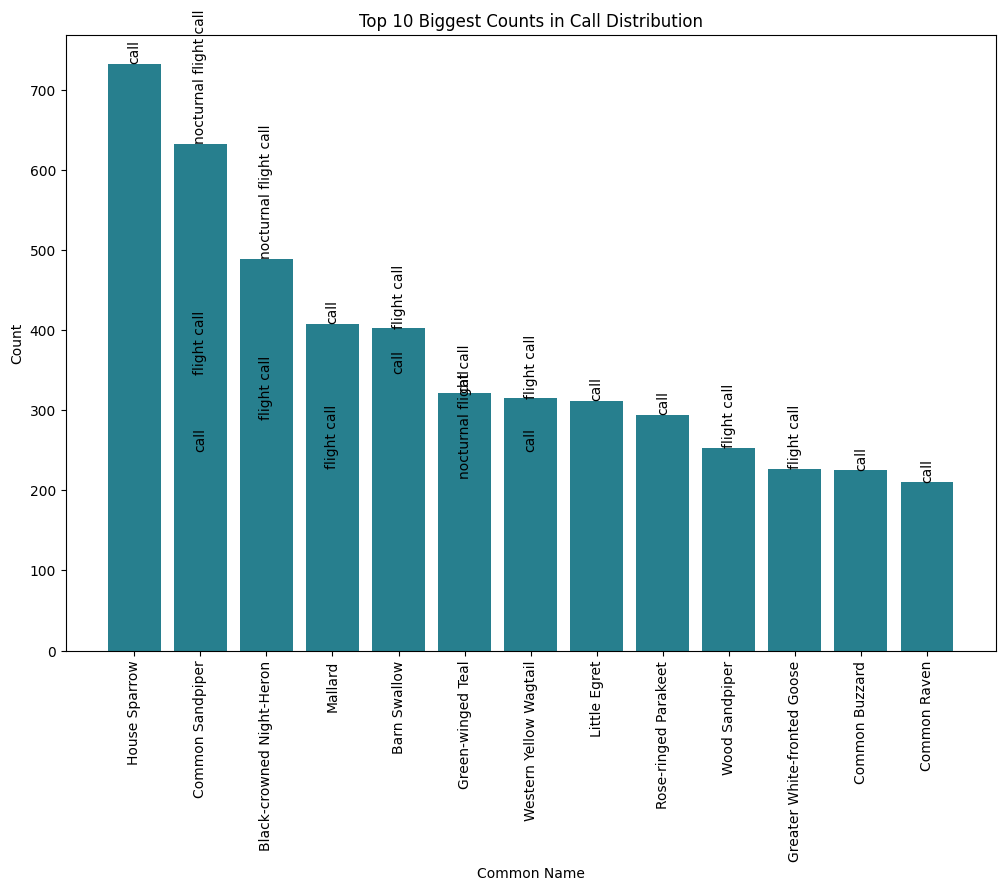

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by 'count' in descending order and select the top 10 rows
top_call_counts = call_distribution_detailed.sort_values(by='count', ascending=False).head(20)

# Set the color palette
sns.set_palette('viridis')

# Plot the data
plt.figure(figsize=(12, 8))

# Add the type of call on top of each bar
for index, row in top_call_counts.iterrows():
    plt.bar(row['common_name'], row['count'])
    plt.text(row['common_name'], row['count'], row['type'], ha='center', va='bottom', rotation=90, color='black')
plt.bar(top_call_counts['common_name'], top_call_counts['count'])
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.title('Top 10 Biggest Counts in Call Distribution')
plt.xticks(rotation=90)
plt.show()

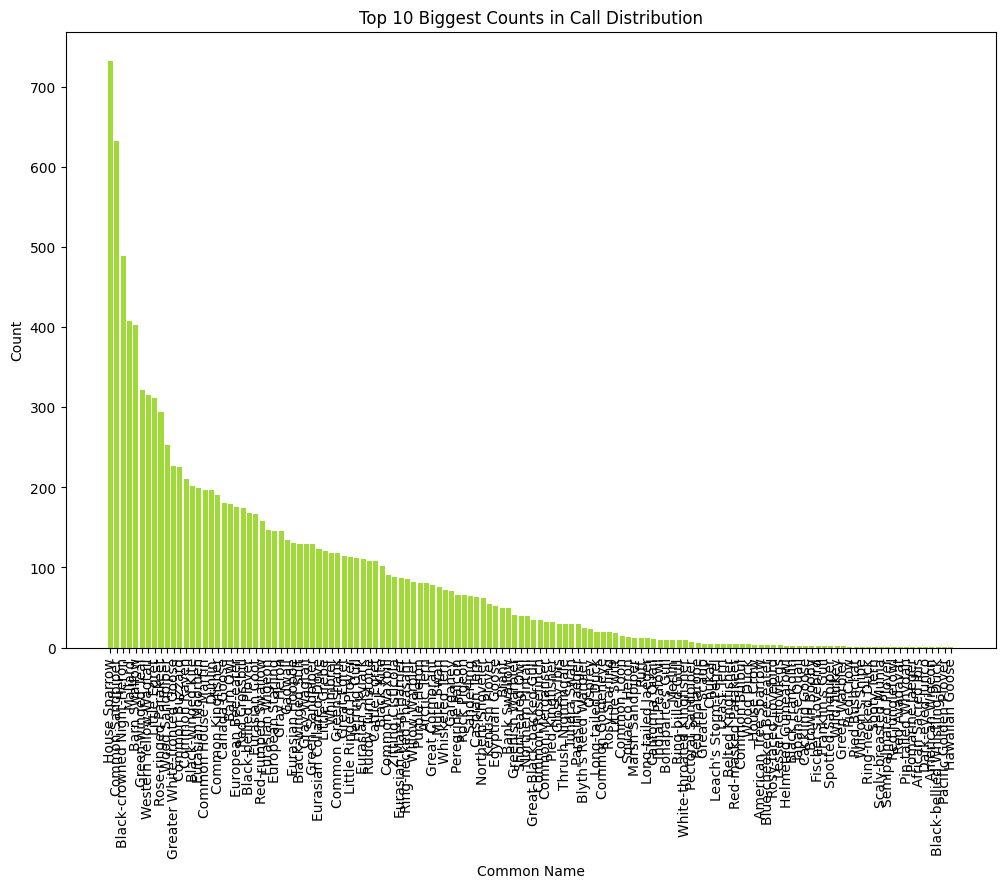

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by 'count' in descending order and select the top 10 rows
top_call_counts = call_distribution_detailed.sort_values(by='count', ascending=False).head(882)

# Set the color palette
sns.set_palette('viridis')

# Plot the data
plt.figure(figsize=(12, 8))

# Add the type of call on top of each bar
for index, row in top_call_counts.iterrows():
    plt.bar(row['common_name'], row['count'])
plt.bar(top_call_counts['common_name'], top_call_counts['count'])
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.title('Top 10 Biggest Counts in Call Distribution')
plt.xticks(rotation=90)
plt.show()

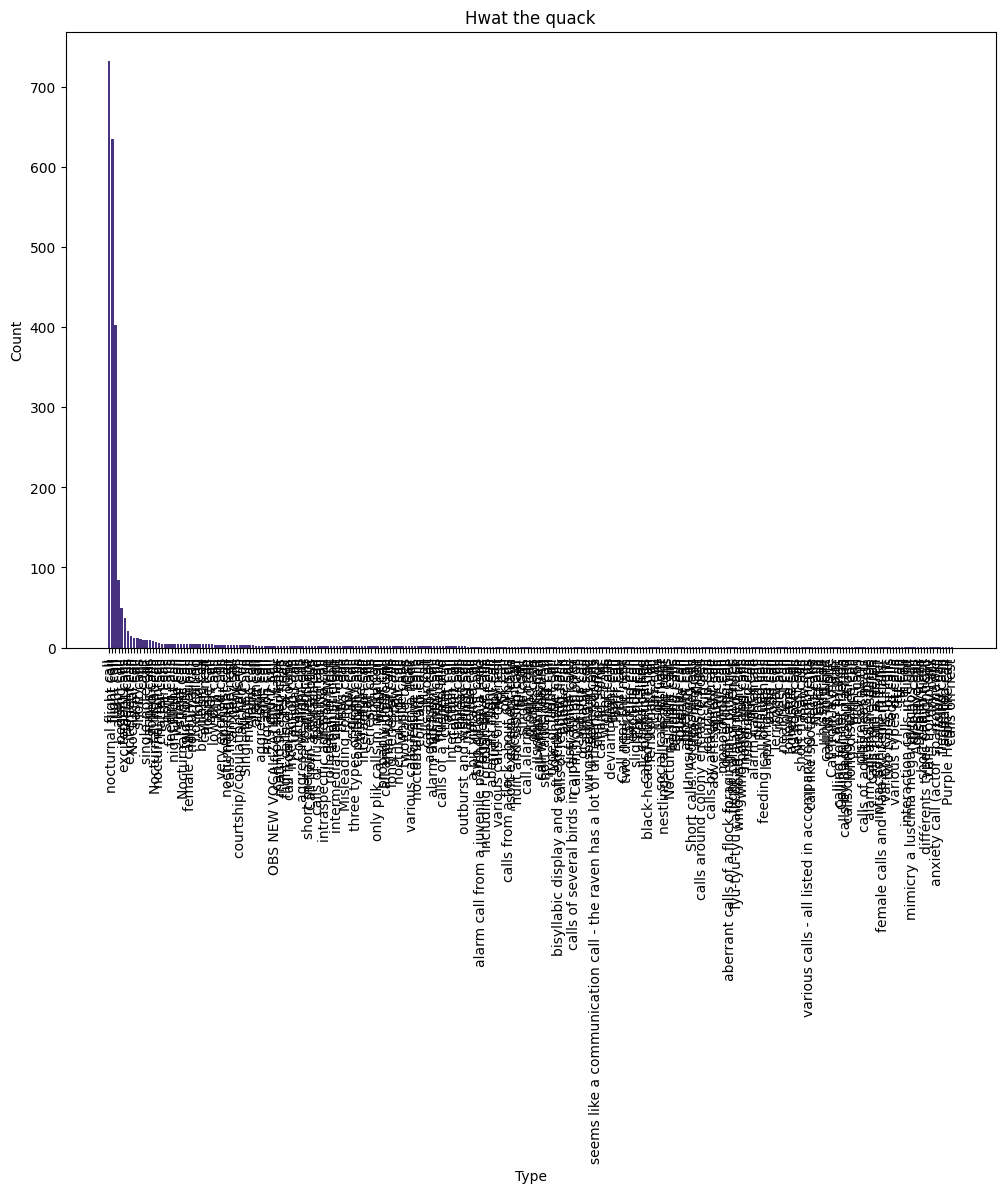

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Sort the dataframe by 'count' in descending order and select the top 20 rows
top_type_counts = call_distribution_detailed.sort_values(by='count', ascending=False).head(882)

# Set the color palette
sns.set_palette('viridis')

# Plot the data
plt.figure(figsize=(12, 8))

# Add the type of call on top of each bar
for index, row in top_type_counts.iterrows():
    plt.bar(row['type'], row['count'])
plt.bar(top_type_counts['type'], top_type_counts['count'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Hwat the quack')
plt.xticks(rotation=90)
plt.show()

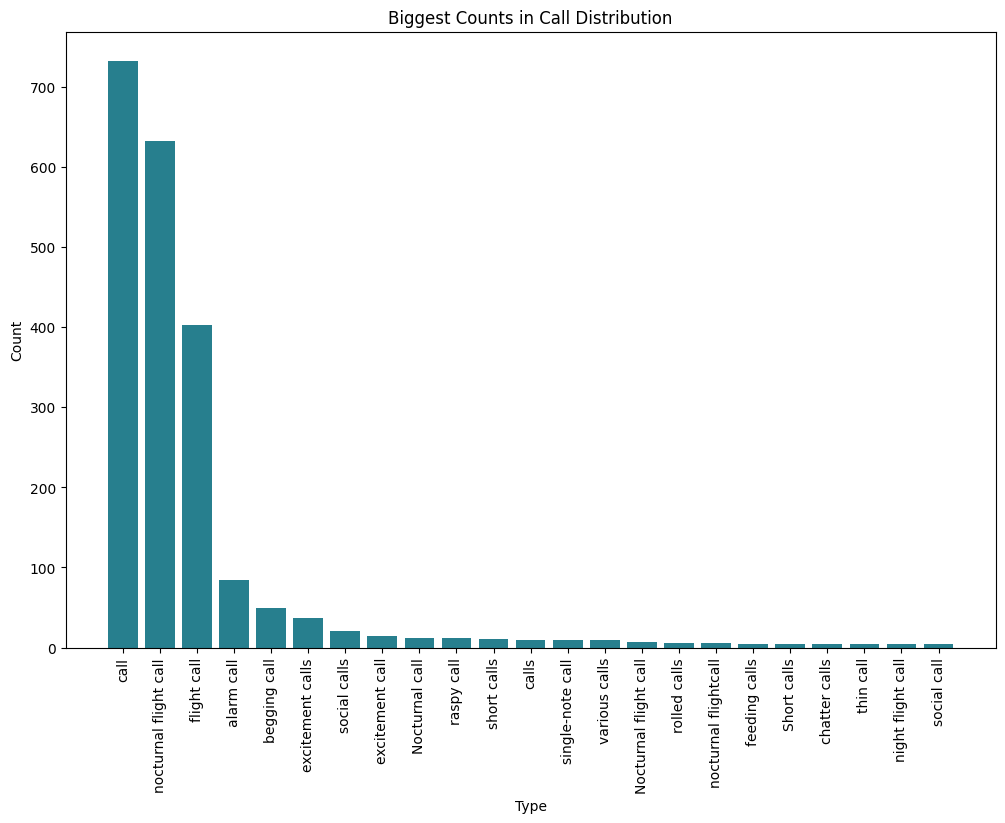

In [30]:
# Sort the dataframe by 'count' in descending order and select the top 20 rows
top_type_counts = call_distribution_detailed.sort_values(by='count', ascending=False).head(350)

# Set the color palette
sns.set_palette('viridis')

# Plot the data
plt.figure(figsize=(12, 8))

# Add the type of call on top of each bar
for index, row in top_type_counts.iterrows():
    plt.bar(row['type'], row['count'])
plt.bar(top_type_counts['type'], top_type_counts['count'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Biggest Counts in Call Distribution')
plt.xticks(rotation=90)
plt.show()

In [39]:
common_name_counts = df['common_name'].value_counts().reset_index()
common_name_counts.columns = ['common_name', 'count']
print(common_name_counts)
common_name_counts.head(70)

                   common_name  count
0             Common Sandpiper   1305
1                House Sparrow   1116
2                 Barn Swallow    981
3    Black-crowned Night-Heron    888
4               Wood Sandpiper    774
..                         ...    ...
138                 Sooty Tern      1
139                Common Myna      1
140      Black-crowned Tchagra      1
141                  Pied Crow      1
142            Pomarine Jaeger      1

[143 rows x 2 columns]


common_name  count
0            Common Sandpiper   1305
1               House Sparrow   1116
2                Barn Swallow    981
3   Black-crowned Night-Heron    888
4              Wood Sandpiper    774
..                        ...    ...
65             Egyptian Goose    101
66                      Brant    100
67            Short-eared Owl     98
68               Bank Swallow     86
69                Glossy Ibis     83

[70 rows x 2 columns]

In [43]:
nocturnal_flight_call_count = call_distribution_detailed[call_distribution_detailed['type'] == 'nocturnal flight call']['common_name'].nunique()
print(f"Number of unique common names with 'nocturnal flight call': {nocturnal_flight_call_count}")

Number of unique common names with 'nocturnal flight call': 69


In [47]:
common_sandpiper_entries = df[df['common_name'] == 'Common Sandpiper']
common_sandpiper_entries.head(20)

primary_label secondary_labels                               type   
6364        comsan               []                      [flight call]  \
6365        comsan               []                [call, flight call]   
6366        comsan               []  [female, flight call, male, song]   
6367        comsan               []                      [flight call]   
6368        comsan               []                      [flight call]   
6369        comsan               []                      [flight call]   
6370        comsan               []          [alarm call, flight call]   
6371        comsan               []                             [call]   
6372        comsan               []                             [song]   
6373        comsan               []                      [flight call]   
6374        comsan               []                      [flight call]   
6375        comsan               []                [flight call, song]   
6376        comsan               []                 [alarm call, call]   
6377        comsan               []                 [alarm call, call]   
6378        comsan               []                       [call, song]   
6379        comsan               []                       [call, song]   
6380        comsan               []                [call, flight call]   
6381        comsan       ['arcter']                       [call, song]   
6382        comsan               []            [alarm and flight call]   
6383        comsan               []                      [flight call]   

      latitude  longitude     scientific_name       common_name date   
6364   46.4605     6.3914  Actitis hypoleucos  Common Sandpiper  NaN  \
6365   68.5350    23.3210  Actitis hypoleucos  Common Sandpiper  NaN   
6366   52.3527    20.9197  Actitis hypoleucos  Common Sandpiper  NaN   
6367   43.5848    -1.3987  Actitis hypoleucos  Common Sandpiper  NaN   
6368   43.4238    -0.4616  Actitis hypoleucos  Common Sandpiper  NaN   
6369   48.3447    10.9154  Actitis hypoleucos  Common Sandpiper  NaN   
6370   43.4170    -0.4582  Actitis hypoleucos  Common Sandpiper  NaN   
6371   60.7689    11.2296  Actitis hypoleucos  Common Sandpiper  NaN   
6372   60.7757    11.2272  Actitis hypoleucos  Common Sandpiper  NaN   
6373   51.3480    23.0510  Actitis hypoleucos  Common Sandpiper  NaN   
6374   41.5048     0.5470  Actitis hypoleucos  Common Sandpiper  NaN   
6375   68.6501    19.8152  Actitis hypoleucos  Common Sandpiper  NaN   
6376   61.2885    25.8430  Actitis hypoleucos  Common Sandpiper  NaN   
6377   62.9683    30.0108  Actitis hypoleucos  Common Sandpiper  NaN   
6378   45.7825     5.7836  Actitis hypoleucos  Common Sandpiper  NaN   
6379   60.1162    24.4686  Actitis hypoleucos  Common Sandpiper  NaN   
6380   51.4148    26.6607  Actitis hypoleucos  Common Sandpiper  NaN   
6381   64.9834    25.3001  Actitis hypoleucos  Common Sandpiper  NaN   
6382   65.0667    24.6334  Actitis hypoleucos  Common Sandpiper  NaN   
6383   37.3533    -5.8855  Actitis hypoleucos  Common Sandpiper  NaN   

                 filename                                            license   
6364  comsan/XC113844.ogg  Creative Commons Attribution-NonCommercial-Sha...  \
6365  comsan/XC123893.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6366  comsan/XC129378.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6367  comsan/XC142081.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6368  comsan/XC144768.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6369  comsan/XC146265.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6370  comsan/XC146703.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6371  comsan/XC157141.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6372  comsan/XC157223.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6373  comsan/XC187104.ogg  Creative Commons Attribution-NonCommercial-Sha...   
6374  comsan/XC199825.ogg  Creative Commons Attribution-N

/tmp/ipykernel_387541/3691133002.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["common_name"] = df_filtered["common_name"].apply(


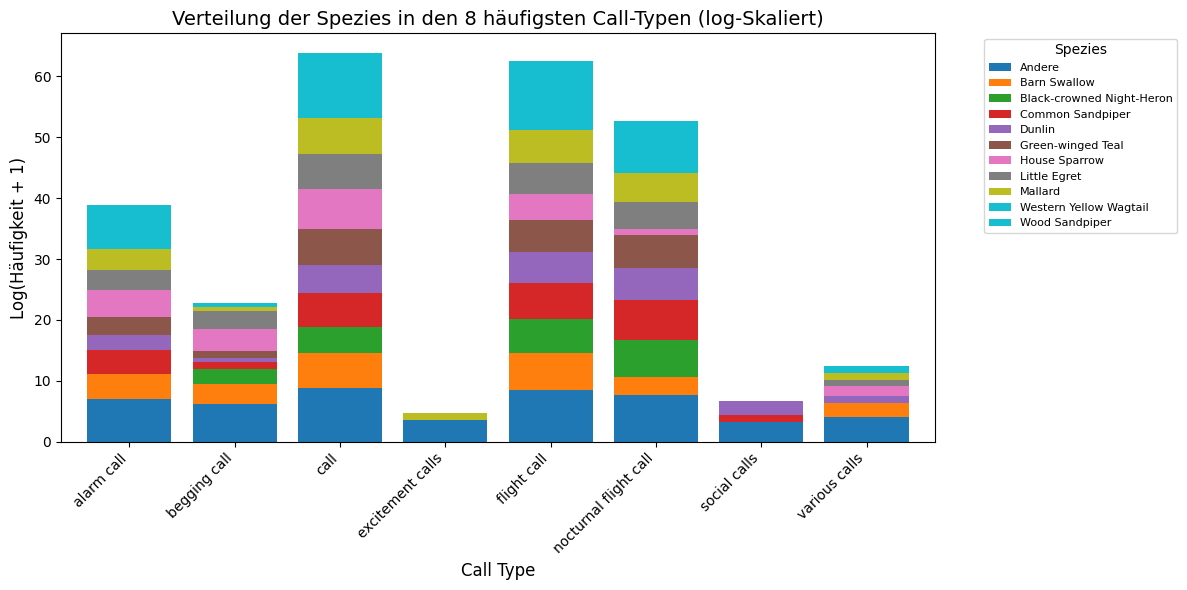

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datei laden
file_path = "call_distribution.csv"  # Falls nötig, den korrekten Pfad anpassen
df = pd.read_csv(file_path)

# Die 8 häufigsten Call-Typen bestimmen
top_8_calls = df.groupby("type")["count"].sum().nlargest(8).index
df_filtered = df[df["type"].isin(top_8_calls)]

# Die 10 häufigsten Spezies bestimmen
top_10_species = df.groupby("common_name")["count"].sum().nlargest(10).index

# Spezies-Kategorisierung: Top 10 beibehalten, andere als "Andere" zusammenfassen
df_filtered["common_name"] = df_filtered["common_name"].apply(
    lambda x: x if x in top_10_species else "Andere"
)

# Daten aggregieren
df_grouped = df_filtered.groupby(["type", "common_name"])["count"].sum().reset_index()
df_pivot = df_grouped.pivot(index="type", columns="common_name", values="count").fillna(0)

# Logarithmische Skalierung (log1p vermeidet Probleme mit 0-Werten)
df_pivot_log = np.log1p(df_pivot)

# Stacked Bar Chart erstellen
fig, ax = plt.subplots(figsize=(12, 6))
df_pivot_log.plot(kind="bar", stacked=True, colormap="tab10", ax=ax, width=0.8)

# Achsentitel und Labels setzen
ax.set_xlabel("Call Type", fontsize=12)
ax.set_ylabel("Log(Häufigkeit + 1)", fontsize=12)
ax.set_title("Verteilung der Spezies in den 8 häufigsten Call-Typen (log-Skaliert)", fontsize=14)
ax.legend(title="Spezies", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)

# Layout optimieren
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [50]:
# Die 8 häufigsten Call-Typen bestimmen
top_8_calls = df.groupby("type")["count"].sum().nlargest(8).index

# Datensatz auf diese Call-Typen filtern
df_filtered = df[df["type"].isin(top_8_calls)]

# Die relative Häufigkeit der Spezies innerhalb jedes Call-Typs berechnen
df_grouped = df_filtered.groupby(["type", "common_name"])["count"].sum().reset_index()

# Pivot-Tabelle für das Stacked Bar Chart
df_pivot = df_grouped.pivot(index="type", columns="common_name", values="count").fillna(0)

# Umwandlung in relative Häufigkeiten pro Call-Typ
df_pivot_rel = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Datenstruktur prüfen
df_pivot_rel.head()


common_name       African Sacred Ibis  American Tree Sparrow  American Wigeon   
type                                                                            
alarm call                   0.000000               0.000000         0.000000  \
begging call                 0.001634               0.000000         0.000000   
call                         0.000000               0.000322         0.000107   
excitement calls             0.000000               0.000000         0.000000   
flight call                  0.000000               0.000000         0.000000   

common_name       Arctic Tern  Bank Swallow  Barn Owl  Barn Swallow   
type                                                                  
alarm call           0.030843      0.007539  0.005483      0.038382  \
begging call         0.011438      0.001634  0.050654      0.039216   
call                 0.008697      0.004187  0.019218      0.037148   
excitement calls     0.000000      0.000000  0.000000      0.000000   
flight call          0.008202      0.006482  0.012965      0.053182   

common_name       Belted Kingfisher  Black Francolin  Black Kite  ...   
type                                                              ...   
alarm call                 0.000000         0.000000    0.005483  ...  \
begging call               0.000000         0.000000    0.022876  ...   
call                       0.000429         0.000215    0.010951  ...   
excitement calls           0.000000         0.000000    0.000000  ...   
flight call                0.000000         0.000000    0.007673  ...   

common_name       Western Yellow Wagtail  Whimbrel  Whiskered Tern   
type                                                                 
alarm call                      0.013708  0.012337        0.013708  \
begging call                    0.001634  0.000000        0.024510   
call                            0.026627  0.006120        0.006442   
excitement calls                0.000000  0.000000        0.000000   
flight call                     0.041672  0.013362        0.009525   

common_name       White-throated Kingfisher  Wild Turkey  Willow Warbler   
type                                                                       
alarm call                         0.000000     0.000000        0.005483  \
begging call                       0.000000     0.000000        0.011438   
call                               0.000966     0.000215        0.008804   
excitement calls                   0.000000     0.000000        0.000000   
flight call                        0.000265     0.000000        0.000132   

common_name       Wilson's Snipe  Wood Duck  Wood Sandpiper  Zitting Cisticola  
type                                                                            
alarm call              0.000000   0.000000        0.046607           0.009596  
begging call            0.000000   0.000000        0.000000           0.000000  
call                    0.000107   0.000429        0.018145           0.009448  
excitement calls        0.000000   0.000000        0.000000           0.000000  
flight call             0.000132   0.000132        0.033470           0.008467  

[5 rows x 134 columns]

/tmp/ipykernel_387541/787423229.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(df_pivot_rel.columns))
/tmp/ipykernel_387541/787423229.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


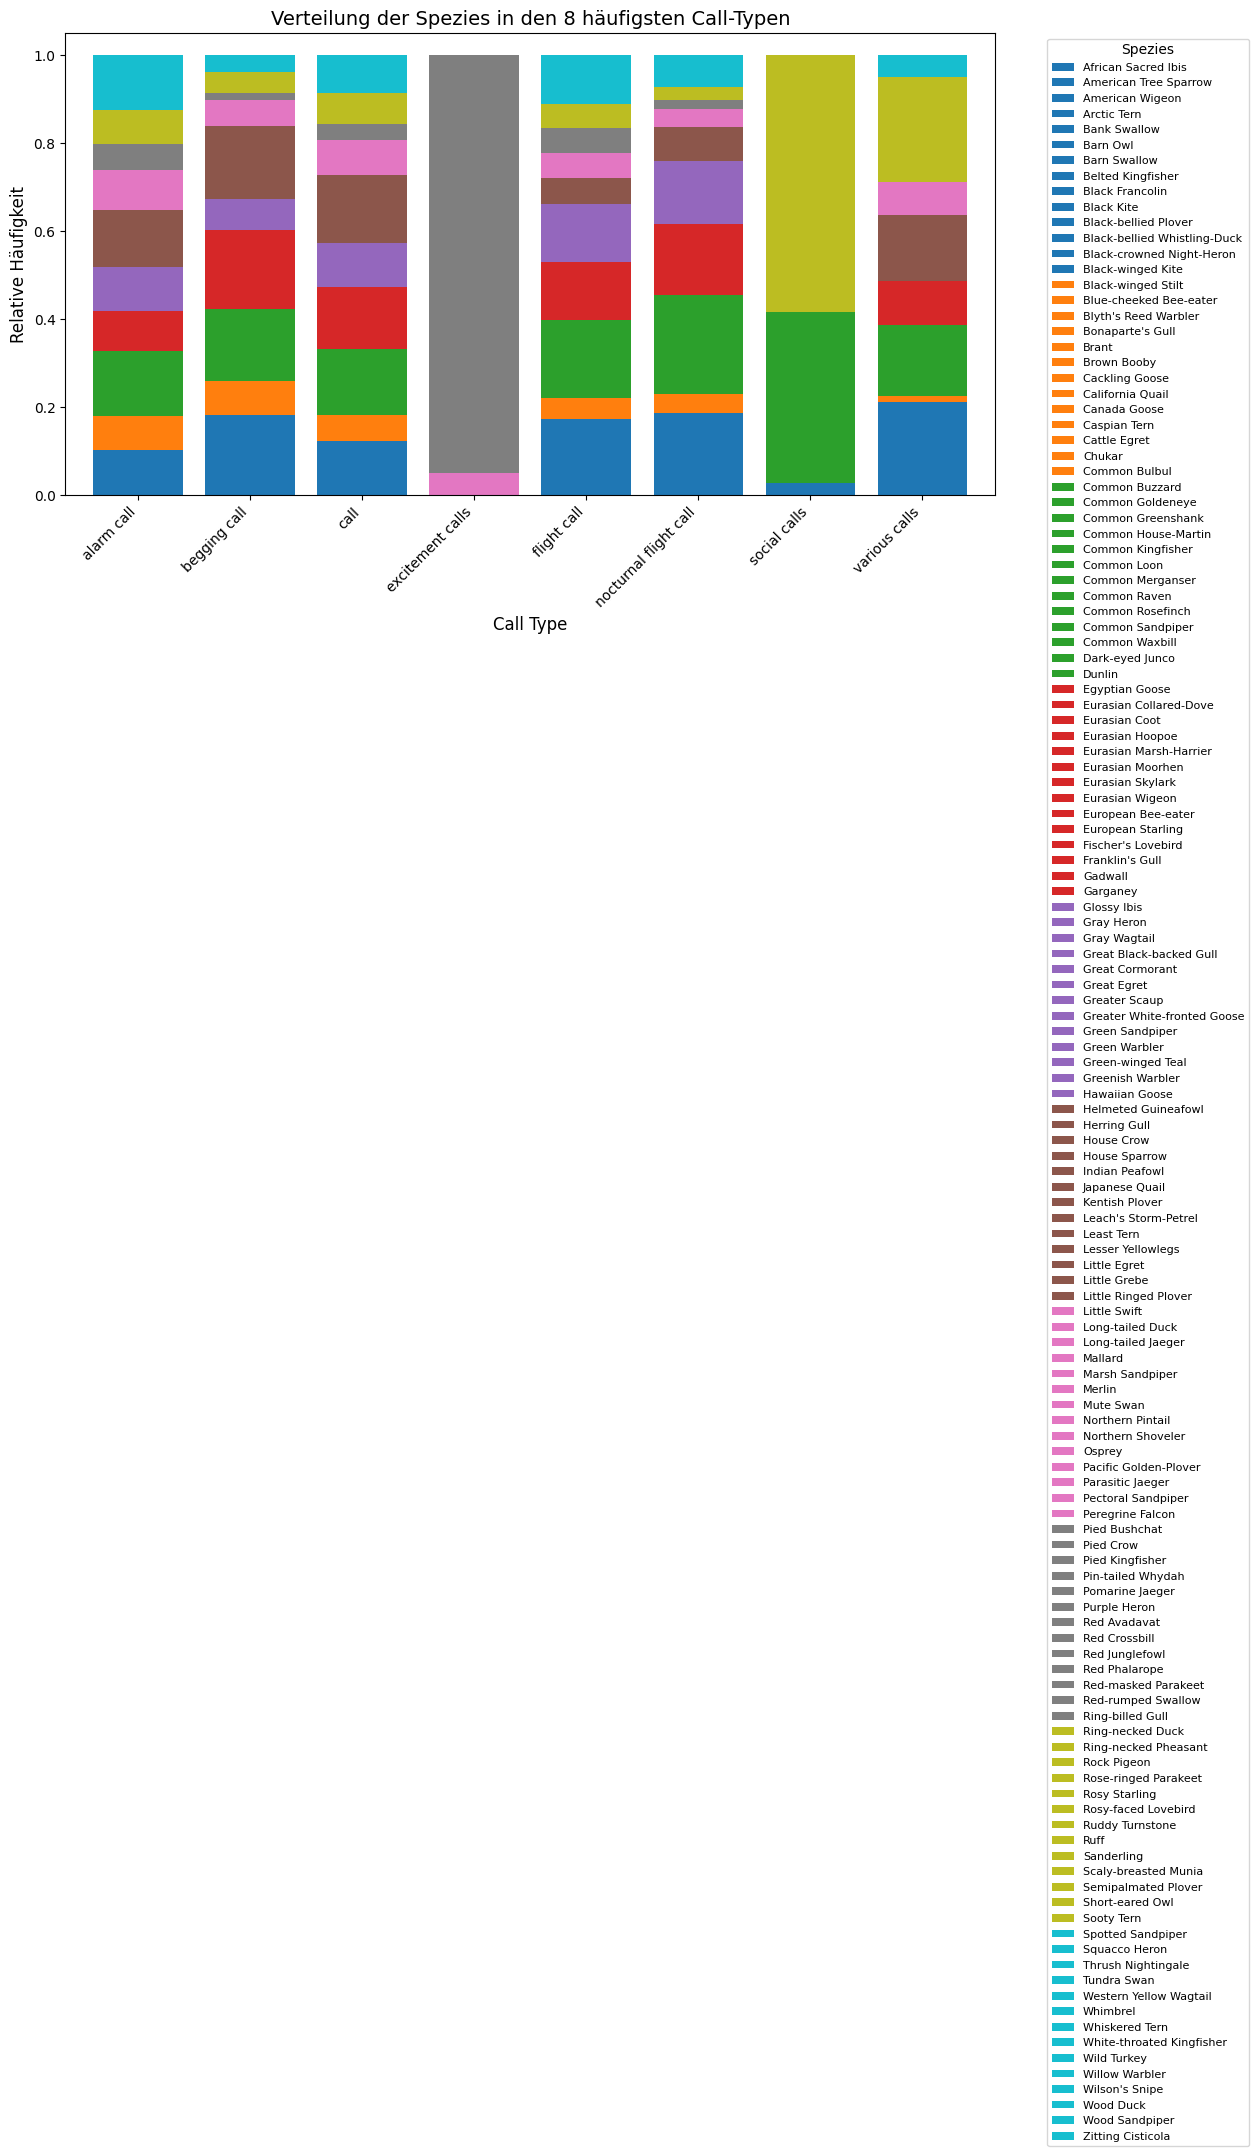

In [51]:
import matplotlib.pyplot as plt

# Farbschema generieren (Tab10 für hohe Kontraste)
colors = plt.cm.get_cmap("tab10", len(df_pivot_rel.columns))

# Stacked Bar Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))
df_pivot_rel.plot(kind="bar", stacked=True, colormap="tab10", ax=ax, width=0.8)

# Achsentitel und Labels setzen
ax.set_xlabel("Call Type", fontsize=12)
ax.set_ylabel("Relative Häufigkeit", fontsize=12)
ax.set_title("Verteilung der Spezies in den 8 häufigsten Call-Typen", fontsize=14)
ax.legend(title="Spezies", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)

# Layout optimieren und Plot anzeigen
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


/tmp/ipykernel_387541/1012307572.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["common_name"] = df_filtered["common_name"].apply(
/tmp/ipykernel_387541/1012307572.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(df_pivot_rel.columns))


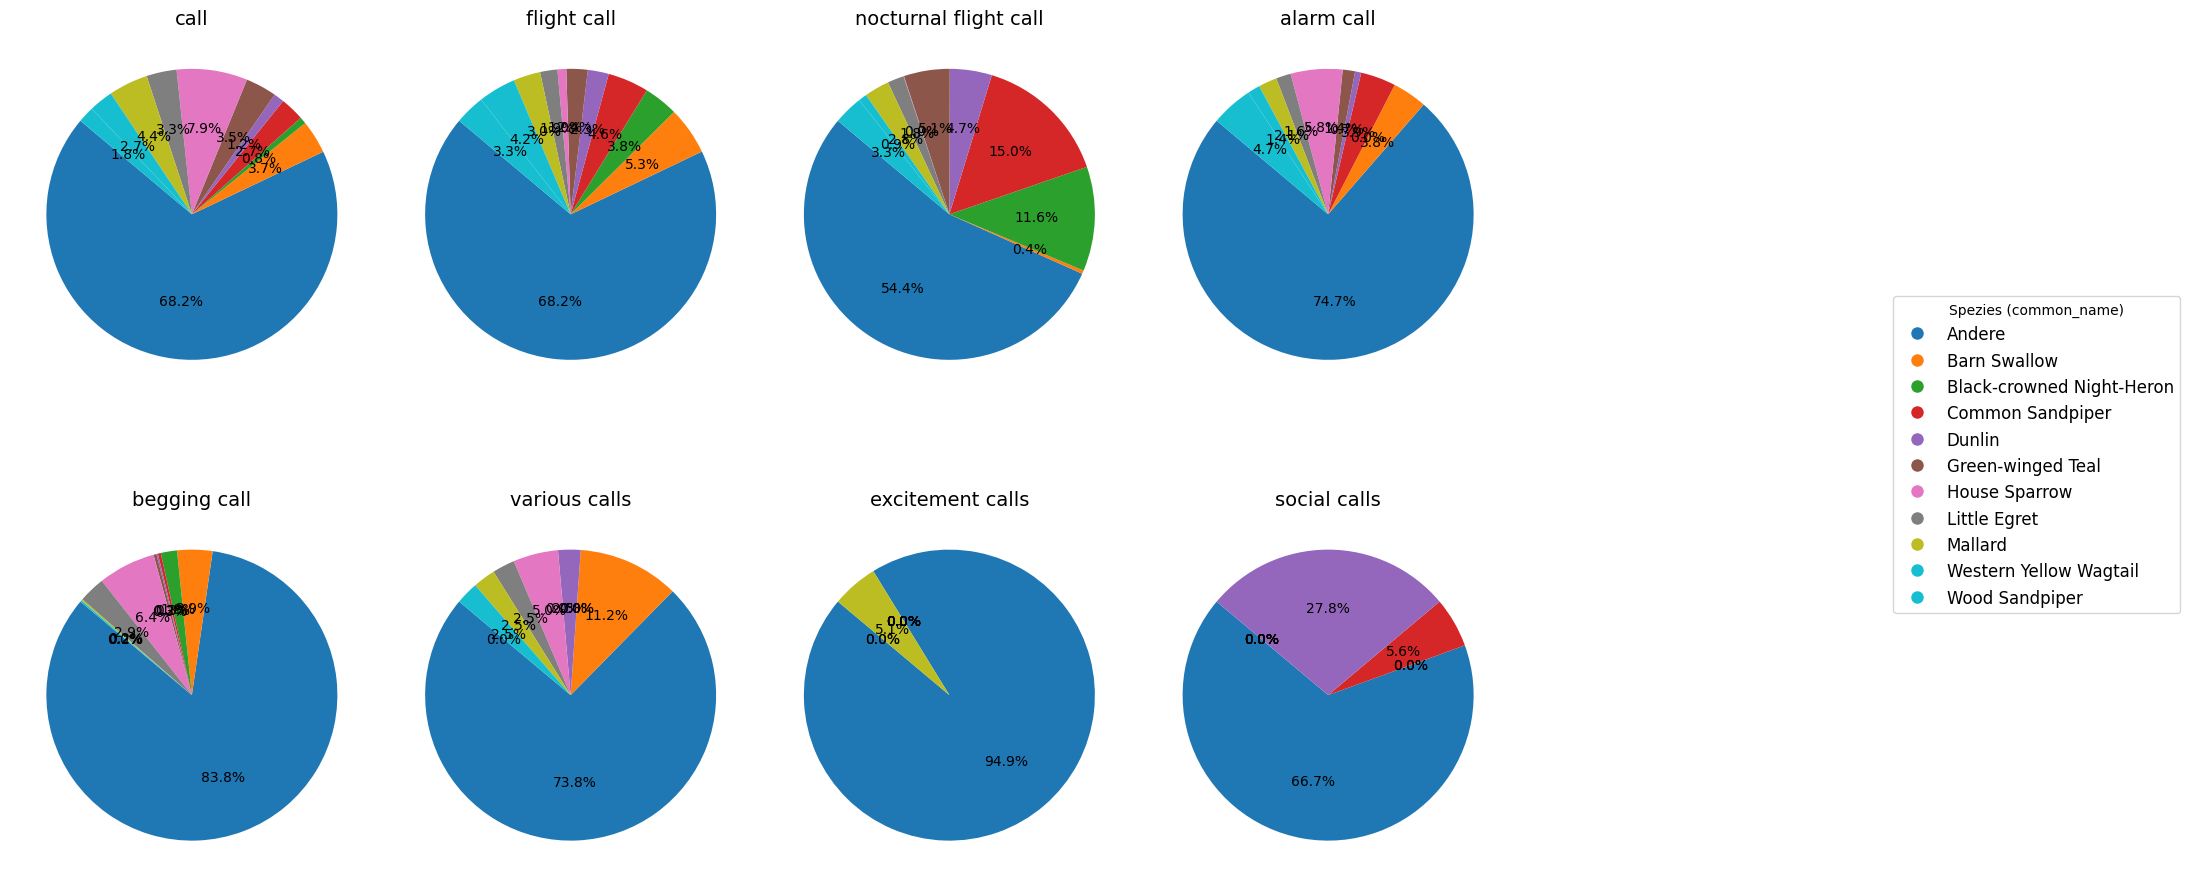

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden
file_path = "call_distribution.csv"  # Falls nötig, den Pfad anpassen
df = pd.read_csv(file_path)

# Die 8 häufigsten Call-Typen bestimmen (nach absoluter Häufigkeit)
top_8_calls = df.groupby("type")["count"].sum().nlargest(8).index
df_filtered = df[df["type"].isin(top_8_calls)]

# Die 10 häufigsten Spezies bestimmen
top_10_species = df.groupby("common_name")["count"].sum().nlargest(10).index

# Spezies-Kategorisierung: Top 10 beibehalten, andere als "Andere" zusammenfassen
df_filtered["common_name"] = df_filtered["common_name"].apply(
    lambda x: x if x in top_10_species else "Andere"
)

# Daten aggregieren
df_grouped = df_filtered.groupby(["type", "common_name"])["count"].sum().reset_index()

# Pivot-Tabelle für relative Häufigkeiten innerhalb jedes Call-Typs
df_pivot = df_grouped.pivot(index="type", columns="common_name", values="count").fillna(0)

# Relative Werte berechnen
df_pivot_rel = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Sortierung der Call-Typen nach Gesamthäufigkeit
sorted_types = df_pivot.sum(axis=1).sort_values(ascending=False).index
df_pivot_rel = df_pivot_rel.loc[sorted_types]

# Farben generieren (Tab10 für hohen Kontrast)
colors = plt.cm.get_cmap("tab10", len(df_pivot_rel.columns))
color_map = {species: colors(i) for i, species in enumerate(df_pivot_rel.columns)}

# Pie Charts erstellen
fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # Größere Darstellung
axes = axes.flatten()

for i, call_type in enumerate(df_pivot_rel.index):
    ax = axes[i]
    data = df_pivot_rel.loc[call_type]
    ax.pie(
        data,
        labels=None,  # Labels entfernen, um Überlappungen zu vermeiden
        autopct="%1.1f%%",
        colors=[color_map[species] for species in data.index],
        startangle=140
    )
    ax.set_title(call_type, fontsize=14)

# Legende außerhalb des Plots platzieren
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[name], markersize=10) 
           for name in df_pivot_rel.columns]

fig.legend(handles, df_pivot_rel.columns, title="Spezies (common_name)", bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=12)

# Layout optimieren
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Platz für die Legende lassen
plt.show()


/tmp/ipykernel_387541/579299856.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["common_name"] = df_filtered["common_name"].apply(
/tmp/ipykernel_387541/579299856.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(df_pivot_rel.columns))


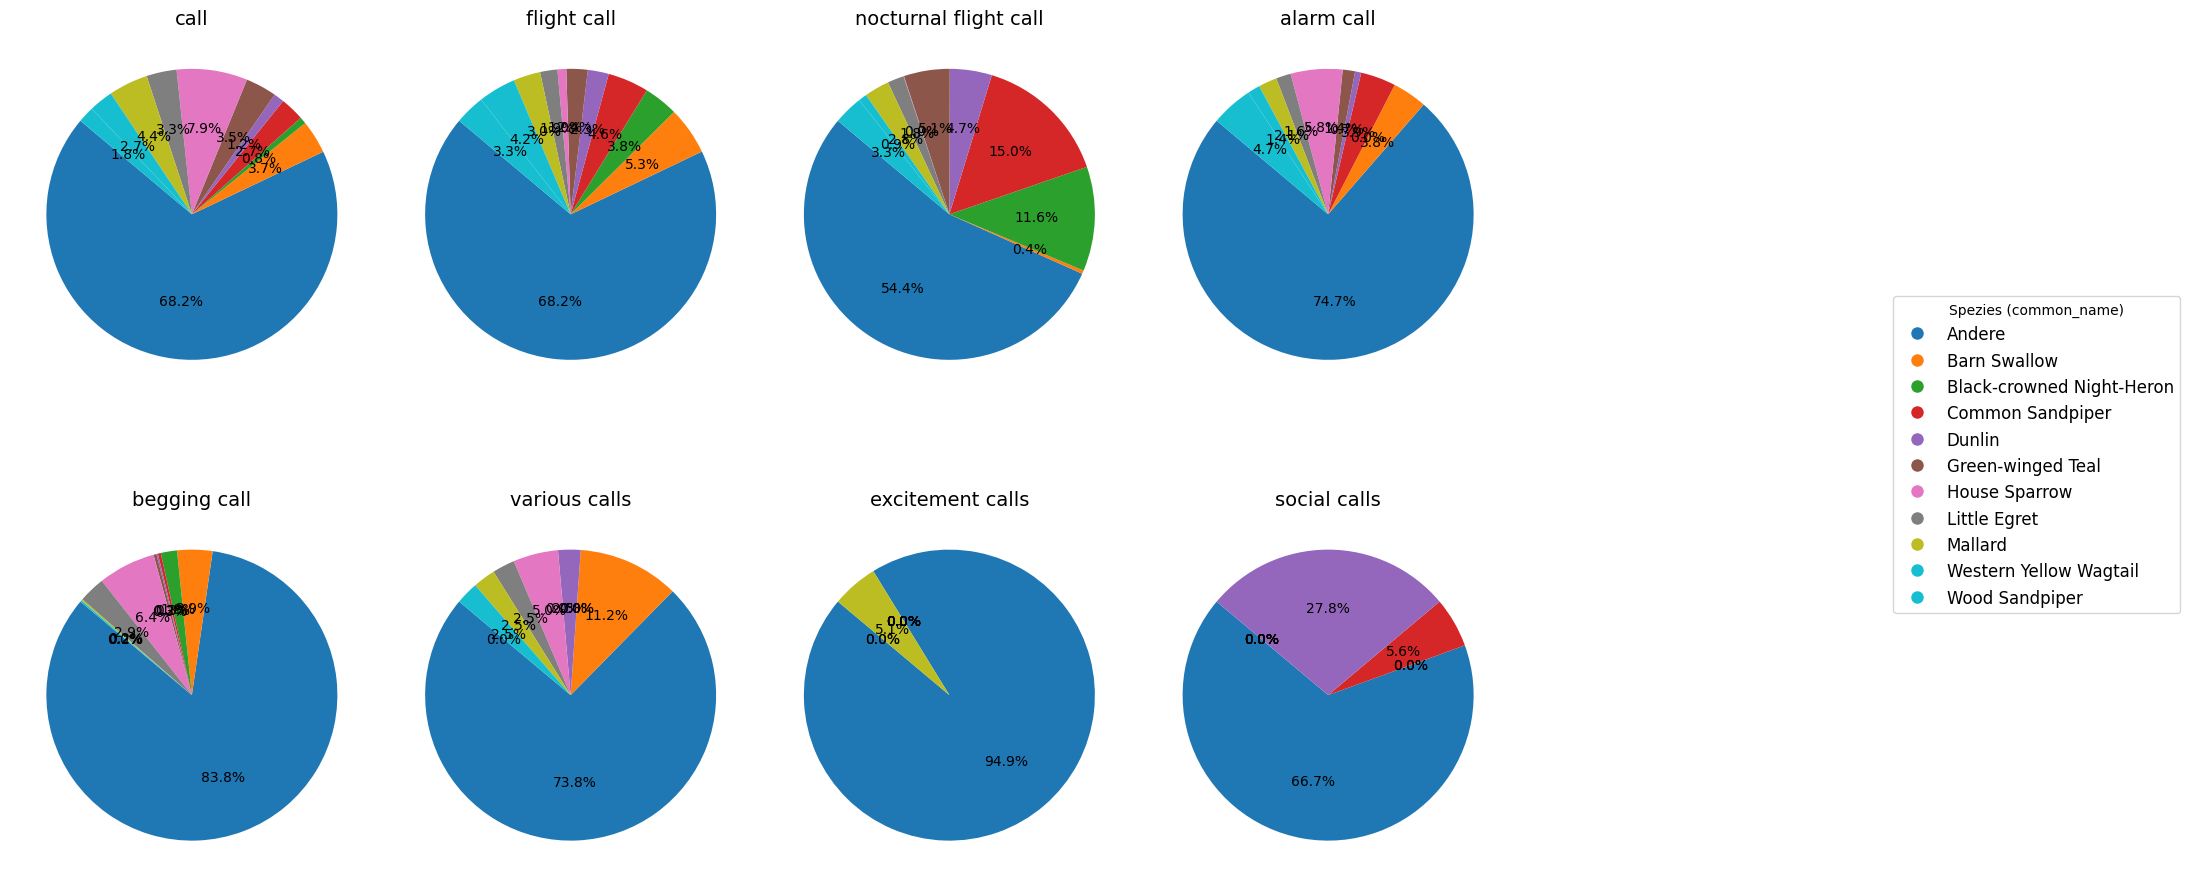

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden
file_path = "call_distribution.csv"  # Falls nötig, den Pfad anpassen
df = pd.read_csv(file_path)

# Die 8 häufigsten Call-Typen bestimmen (nach absoluter Häufigkeit)
top_20_calls = df.groupby("type")["count"].sum().nlargest(20).index
df_filtered = df[df["type"].isin(top_8_calls)]

# Die 10 häufigsten Spezies bestimmen
top_10_species = df.groupby("common_name")["count"].sum().nlargest(10).index

# Spezies-Kategorisierung: Top 10 beibehalten, andere als "Andere" zusammenfassen
df_filtered["common_name"] = df_filtered["common_name"].apply(
    lambda x: x if x in top_10_species else "Andere"
)

# Daten aggregieren
df_grouped = df_filtered.groupby(["type", "common_name"])["count"].sum().reset_index()

# Pivot-Tabelle für relative Häufigkeiten innerhalb jedes Call-Typs
df_pivot = df_grouped.pivot(index="type", columns="common_name", values="count").fillna(0)

# Relative Werte berechnen
df_pivot_rel = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Sortierung der Call-Typen nach Gesamthäufigkeit
sorted_types = df_pivot.sum(axis=1).sort_values(ascending=False).index
df_pivot_rel = df_pivot_rel.loc[sorted_types]

# Farben generieren (Tab10 für hohen Kontrast)
colors = plt.cm.get_cmap("tab10", len(df_pivot_rel.columns))
color_map = {species: colors(i) for i, species in enumerate(df_pivot_rel.columns)}

# Pie Charts erstellen
fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # Größere Darstellung
axes = axes.flatten()

for i, call_type in enumerate(df_pivot_rel.index):
    ax = axes[i]
    data = df_pivot_rel.loc[call_type]
    ax.pie(
        data,
        labels=None,  # Labels entfernen, um Überlappungen zu vermeiden
        autopct="%1.1f%%",
        colors=[color_map[species] for species in data.index],
        startangle=140
    )
    ax.set_title(call_type, fontsize=14)

# Legende außerhalb des Plots platzieren
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[name], markersize=10) 
           for name in df_pivot_rel.columns]

fig.legend(handles, df_pivot_rel.columns, title="Spezies (common_name)", bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=12)

# Layout optimieren
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Platz für die Legende lassen
plt.show()


/tmp/ipykernel_387541/1813951682.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["common_name"] = df_filtered["common_name"].apply(
/tmp/ipykernel_387541/1813951682.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(df_pivot_rel.columns))


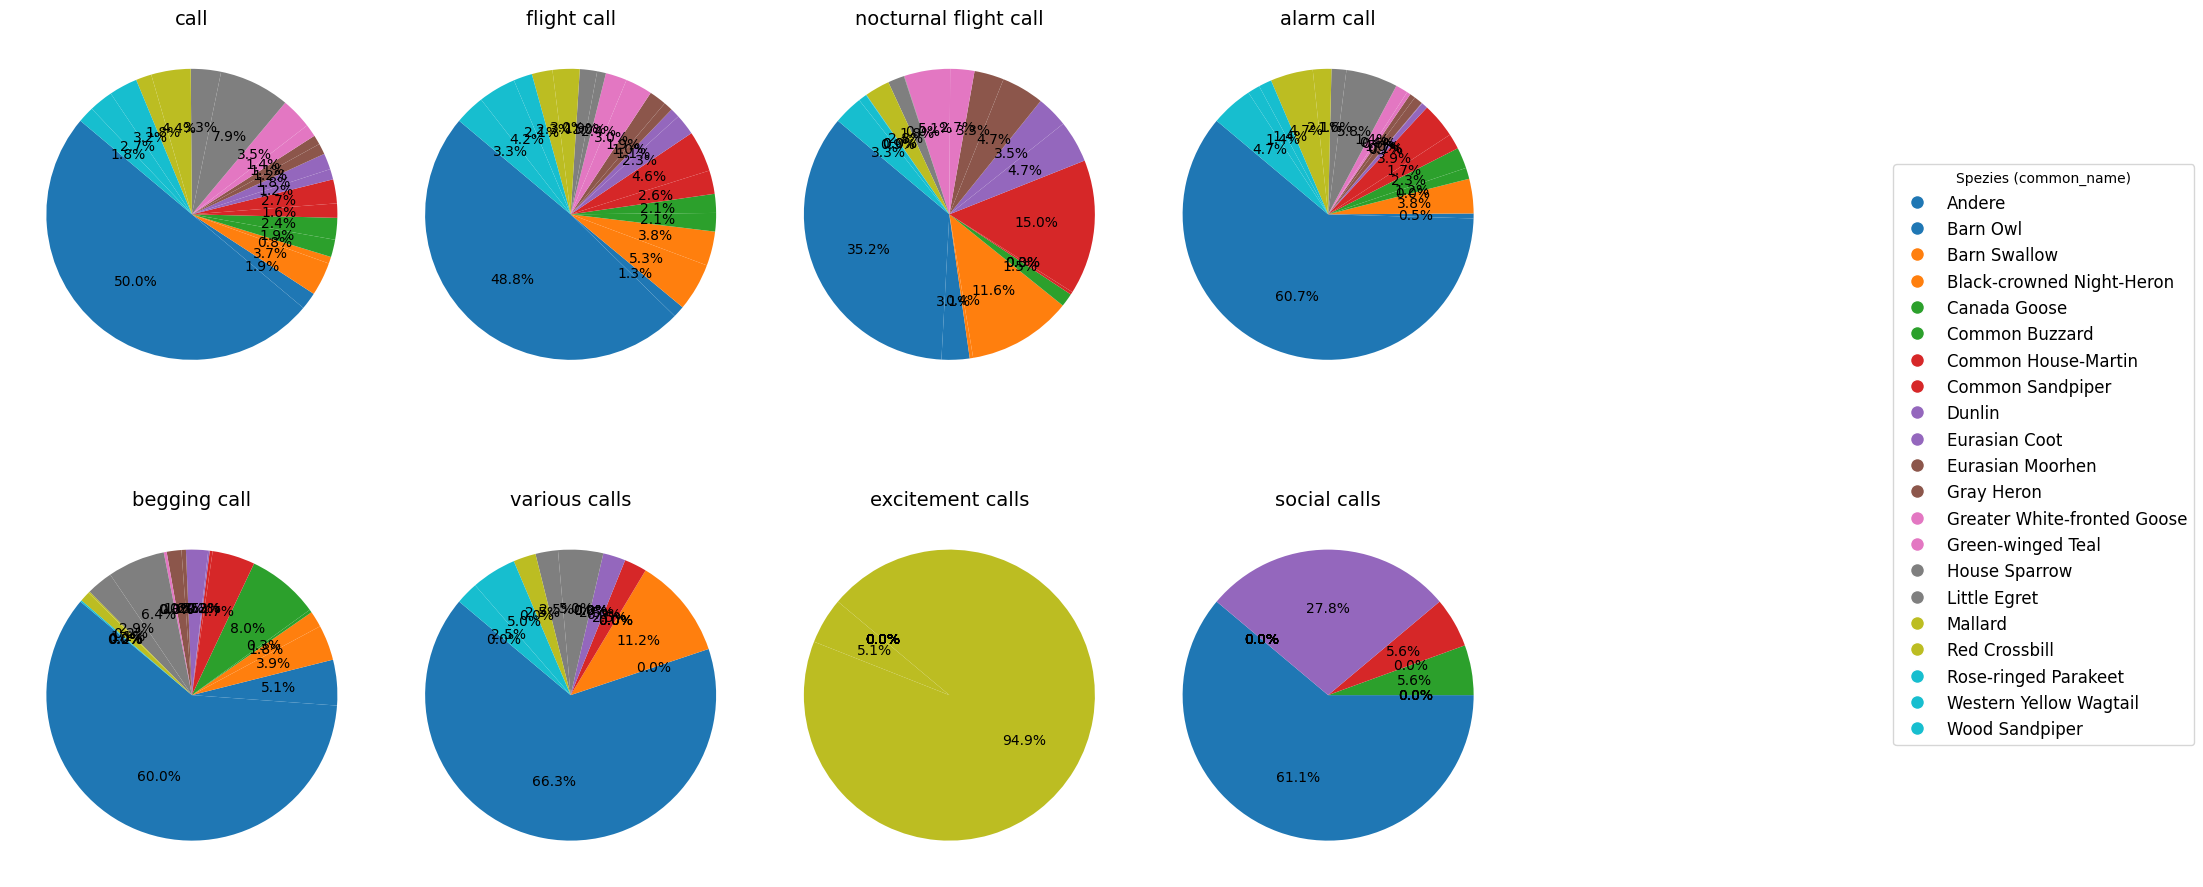

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden
file_path = "call_distribution.csv"  # Falls nötig, den Pfad anpassen
df = pd.read_csv(file_path)

# Die 8 häufigsten Call-Typen bestimmen (nach absoluter Häufigkeit)
top_8_calls = df.groupby("type")["count"].sum().nlargest(8).index
df_filtered = df[df["type"].isin(top_8_calls)]

# Die 20 häufigsten Spezies bestimmen (statt nur 10)
top_20_species = df.groupby("common_name")["count"].sum().nlargest(20).index

# Spezies-Kategorisierung: Top 20 beibehalten, andere als "Andere" zusammenfassen
df_filtered["common_name"] = df_filtered["common_name"].apply(
    lambda x: x if x in top_20_species else "Andere"
)

# Daten aggregieren
df_grouped = df_filtered.groupby(["type", "common_name"])["count"].sum().reset_index()

# Pivot-Tabelle für relative Häufigkeiten innerhalb jedes Call-Typs
df_pivot = df_grouped.pivot(index="type", columns="common_name", values="count").fillna(0)

# Relative Werte berechnen
df_pivot_rel = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Sortierung der Call-Typen nach Gesamthäufigkeit
sorted_types = df_pivot.sum(axis=1).sort_values(ascending=False).index
df_pivot_rel = df_pivot_rel.loc[sorted_types]

# Farben generieren (Tab10 für hohen Kontrast)
colors = plt.cm.get_cmap("tab10", len(df_pivot_rel.columns))
color_map = {species: colors(i) for i, species in enumerate(df_pivot_rel.columns)}

# Pie Charts erstellen
fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # Größere Darstellung
axes = axes.flatten()

for i, call_type in enumerate(df_pivot_rel.index):
    ax = axes[i]
    data = df_pivot_rel.loc[call_type]
    ax.pie(
        data,
        labels=None,  # Labels entfernt, um Überlappungen zu vermeiden
        autopct="%1.1f%%",
        colors=[color_map[species] for species in data.index],
        startangle=140
    )
    ax.set_title(call_type, fontsize=14)

# Legende außerhalb des Plots platzieren
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[name], markersize=10) 
           for name in df_pivot_rel.columns]

fig.legend(handles, df_pivot_rel.columns, title="Spezies (common_name)", bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=12)

# Layout optimieren
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Platz für die Legende lassen
plt.show()


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden
file_path = "/mnt/data/call_distribution.csv"  # Falls nötig, den Pfad anpassen
df = pd.read_csv(file_path)

# Die 8 häufigsten Call-Typen bestimmen (nach absoluter Häufigkeit)
top_8_calls = df.groupby("type")["count"].sum().nlargest(8).index
df_filtered = df[df["type"].isin(top_8_calls)]

# Alle Spezies beibehalten (keine "Andere"-Kategorie)
all_species = df["common_name"].unique()

# Daten aggregieren
df_grouped = df_filtered.groupby(["type", "common_name"])["count"].sum().reset_index()

# Pivot-Tabelle für relative Häufigkeiten innerhalb jedes Call-Typs
df_pivot = df_grouped.pivot(index="type", columns="common_name", values="count").fillna(0)

# Relative Werte berechnen
df_pivot_rel = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Sortierung der Call-Typen nach Gesamthäufigkeit
sorted_types = df_pivot.sum(axis=1).sort_values(ascending=False).index
df_pivot_rel = df_pivot_rel.loc[sorted_types]

# Farben generieren (Tab20 für viele verschiedene Farben)
colors = plt.cm.get_cmap("tab20", len(df_pivot_rel.columns))
color_map = {species: colors(i) for i, species in enumerate(df_pivot_rel.columns)}

# Pie Charts erstellen
fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # Größere Darstellung
axes = axes.flatten()

for i, call_type in enumerate(df_pivot_rel.index):
    ax = axes[i]
    data = df_pivot_rel.loc[call_type]
    ax.pie(
        data,
        labels=None,  # Labels entfernt, um Überlappungen zu vermeiden
        autopct="%1.1f%%",
        colors=[color_map[species] for species in data.index],
        startangle=140
    )
    ax.set_title(call_type, fontsize=14)

# Legende außerhalb des Plots platzieren
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[name], markersize=10) 
           for name in df_pivot_rel.columns]

fig.legend(handles, df_pivot_rel.columns, title="Spezies (common_name)", bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=10)

# Layout optimieren
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Platz für die Legende lassen
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/call_distribution.csv'